In [244]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
data=pd.read_excel('titanic3.xls')

In [246]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 1.	Analyse de la forme :

	Identification de la target

	Nombre des lignes et de colonnes

	Identification des valeurs manquantes

	Types de variables

####################################################

1 - La variable target est survived 

2 - le nombre de ligne est de 1309 sur 14 colonnes 

3 - Type des variables : 

          pclass     1309 non-null   int64  
          
          survived   1309 non-null   int64  
 
          sex        1309 non-null   object 
 
          age        1046 non-null   float64
4 - Les valeurs manquantes : 

pclass        0

survived      0

sex           0

age         263 qui veut dire  20 % de valeurs manquantes pour la variable âge 


In [108]:
data.shape

(1309, 14)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [110]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Suppression des lignes inutiles : 

In [111]:
data=data.drop([ 'name', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1)

In [112]:
data.shape

(1309, 4)

In [113]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [114]:
data.isna().sum()/data.shape[0]

pclass      0.000000
survived    0.000000
sex         0.000000
age         0.200917
dtype: float64

<AxesSubplot:>

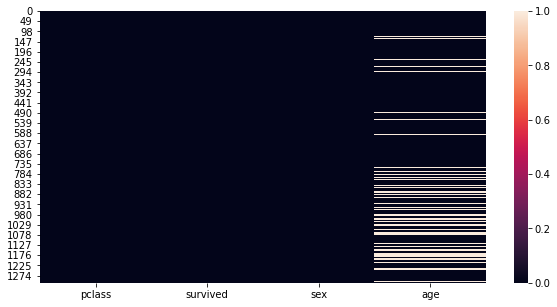

In [115]:
plt.figure(figsize = (10,5))
sns.heatmap(data.isna())

## Analyse du fond :
---Visualisation de la target (histogramme/boxplot)

---Compréhension des différentes variables (recherche)

---Visualisation des relations : feautures/ target

---Identification des outiliers 

###############################################################

D'après l'analyse de la variable target, on remarques que (500 personnes ont survecu au naufrage et 800 sont mort.)

500 = 0.38%

800 = 0.62 %

* En vizualisant la distribution de la variable target (âge), nous remarquons que la majorité des personnes ont entre 20 à 30 ans 

In [116]:
data[['survived']].value_counts()

survived
0           809
1           500
dtype: int64

In [117]:
data[['survived']].value_counts(normalize = True)

survived
0           0.618029
1           0.381971
dtype: float64

### histogrames des variables continues 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


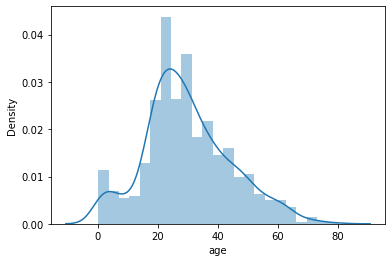

In [131]:
for col in data.select_dtypes('float64'):
    plt.figure()
    sns.distplot(data[col])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


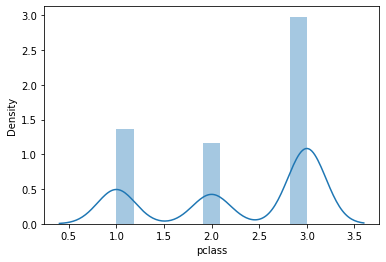

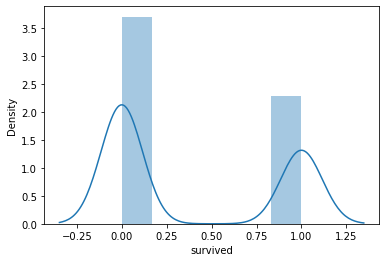

In [125]:
for col in data.select_dtypes('int64'):
    plt.figure()
    sns.distplot(data[col])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

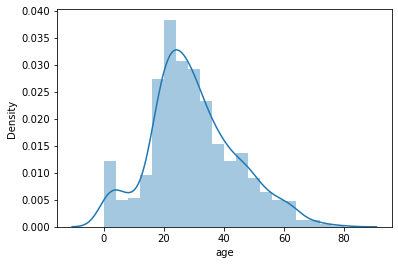

In [129]:
sns.distplot(data['age'], bins=20)

In [137]:
data['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
26.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: age, Length: 98, dtype: int64

In [146]:
for col in data.select_dtypes('object'):
    print(f'{col :-<35} {data[col].unique()}')

sex-------------------------------- ['female' 'male']


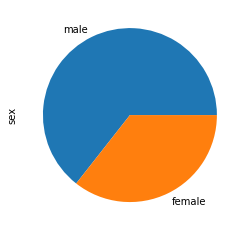

In [148]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

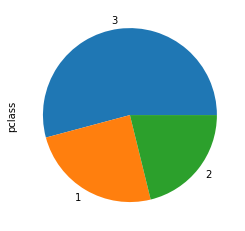

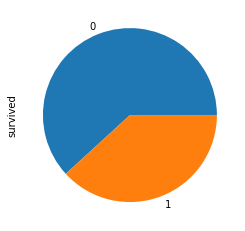

In [159]:
for col in data.select_dtypes('int64'):
    plt.figure()
    data[col].value_counts().plot.pie()

# Relation Target / Variables
### Création de sous-ensembles positifs=survivants et négatifs=non survivants)

In [208]:
positif_data = data[data['survived']==1]
positif_data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
5,1,1,male,48.0000
6,1,1,female,63.0000
8,1,1,female,53.0000


In [164]:
négatif_data = data[data['survived']==0]
négatif_data.head()

,pclass,survived,sex,age
2,1,0,female,2.0
3,1,0,male,30.0
4,1,0,female,25.0
7,1,0,male,39.0
9,1,0,male,71.0


### Création des ensembles 'male' et 'femal' :

In [193]:
male_data = data[data['sex']=='male']
male_data.head()

,pclass,survived,sex,age
1,1,1,male,0.9167
3,1,0,male,30.0000
5,1,1,male,48.0000
7,1,0,male,39.0000
9,1,0,male,71.0000


In [195]:
female_data = data[data['sex']=='female']
female_data.head()

,pclass,survived,sex,age
0,1,1,female,29.0
2,1,0,female,2.0
4,1,0,female,25.0
6,1,1,female,63.0
8,1,1,female,53.0


## Relation target / Sex

<AxesSubplot:xlabel='survived', ylabel='count'>

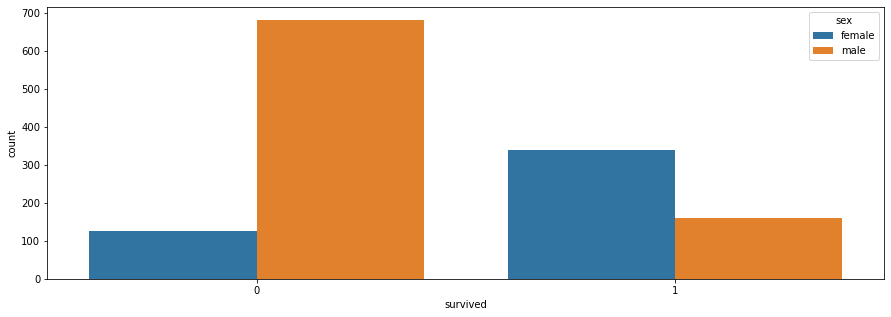

In [224]:
plt.figure(figsize=(15,5))
sns.countplot(x='survived', hue='sex', data=data)

# 




## Analyse approfondie :

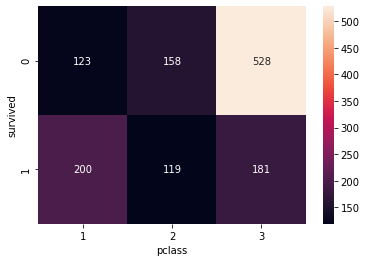

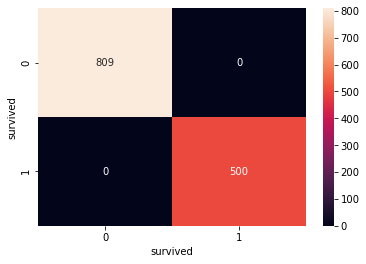

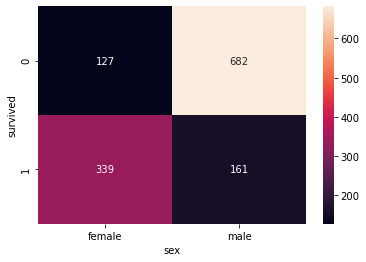

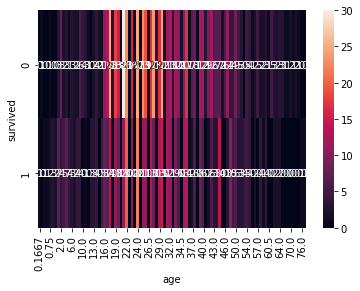

In [237]:
for col in female_data:
    plt.figure()
    sns.heatmap(pd.crosstab(data['survived'], data[col]), annot=True, fmt='d')

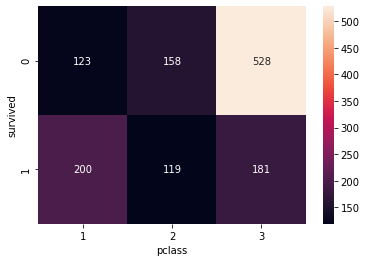

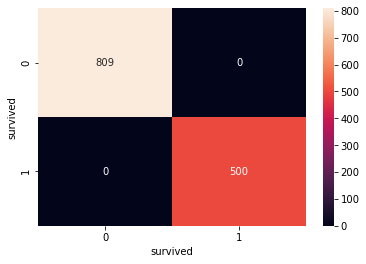

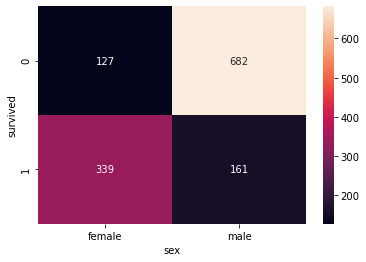

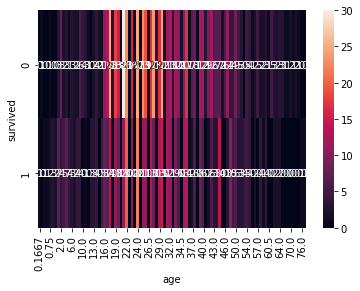

In [238]:
for col in male_data:
    plt.figure()
    sns.heatmap(pd.crosstab(data['survived'], data[col]), annot=True, fmt='d')

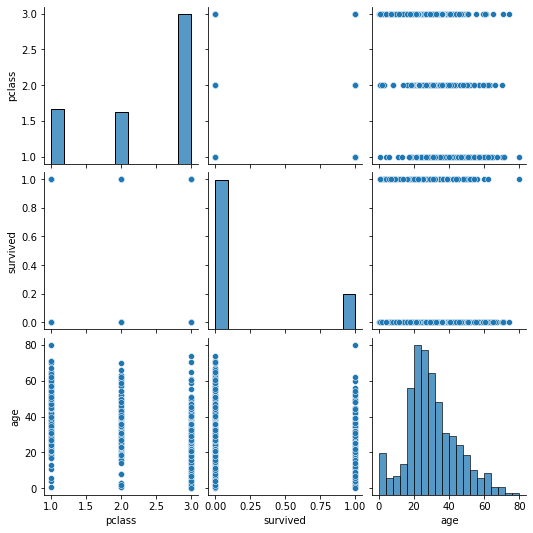

In [242]:
sns.pairplot(male_data)

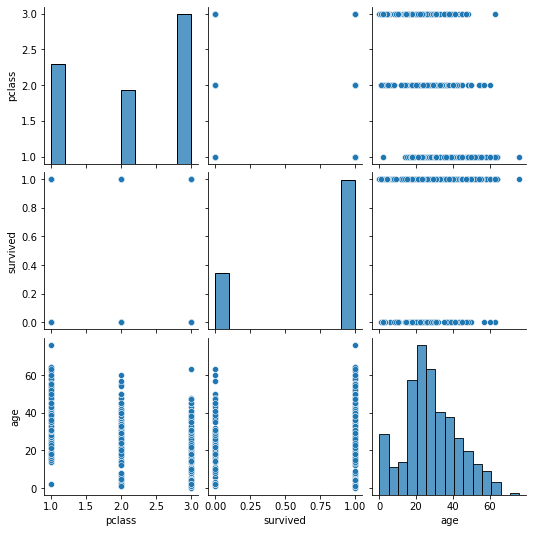

In [243]:
sns.pairplot(female_data)